# Working on Training Data

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#getting data

df=pd.read_csv('titanictrain.csv')

## Exploratory Data Analysis

- PassengerId
- Survived : 0 = No, 1 = Yes (Dependent)
- Pclass : 1, 2, 3 (Class)
- Name
- Sex : 0 = Female, 1 = Male
- Age
- SibSp : # of siblings/spouces
- Parch : # of parents/children
- Ticket
- Fare
- Cabin
- Embarked : 0=C, 1=Q, 2=S (Boarding Point)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
for dataset in df:
    print(dataset)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
A5             1
D11            1
D30            1
F E69          1
D9             1
Name: Cabin, Length: 147, dtype: int64

## Barchart to compare with Survived

In [10]:
df[df['Survived']==1]['Sex'].value_counts()   #count of male/female those who survived

female    233
male      109
Name: Sex, dtype: int64

In [11]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()    #storing count of male/female those who survived in 'survived'
    dead = df[df['Survived']==0][feature].value_counts()        #storing count of male/female those who died in 'dead'
    df1 = pd.DataFrame([survived,dead])                         #saving it in dataframe
    df1.index = ['Survived','Dead']                             #giving index name
    print(df1)
    df1.plot(kind='bar', figsize=(10,5))

              0      1     2     3     4    5    8
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0


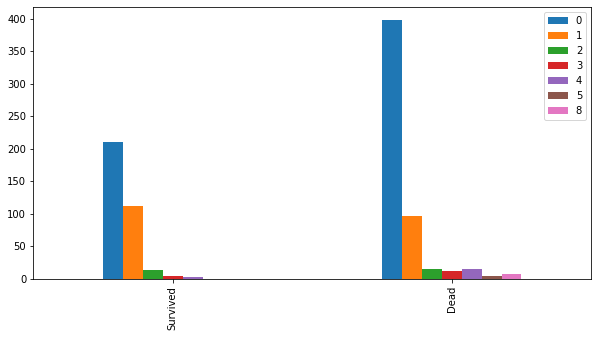

In [12]:
bar_chart('SibSp')

## Feature Engineering

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Sex

In [15]:
d={'female':0, 'male':1}

df['Sex']=df['Sex'].apply(lambda i:d[i])         #Updating sex value as 0/1
    
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

## Embarked

In [16]:
#fill 2 missing values in Embarked with S

df['Embarked']=df['Embarked'].fillna('S')

In [17]:
d1={'C':0, 'Q':1, 'S':2}
df['Embarked']=df['Embarked'].apply(lambda j:d1[j])

df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

## Name

In [18]:
namel = df['Name'].tolist()    #convert dataframe to list
namel

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [19]:
import re

l2=[]

for i in namel:
    x = re.split(",\s", i)          #regex split
    m2 = x[1].split('.')            #string split
    l2.append(m2[0])

l2

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [20]:
Title = pd.DataFrame(l2)        #saving list as dataframe
df['Title']=Title

df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Mme               1
Don               1
Ms                1
Name: Title, dtype: int64

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

## Age

In [22]:
df['Age'].isnull().sum()

177

In [23]:
grouped = df.groupby(['Sex', 'Title'])       #grouping titles a/c to sex
grouped.Age.median()                         #giving a median age to each group

Sex  Title       
0    Dr              49.0
     Lady            48.0
     Miss            21.0
     Mlle            24.0
     Mme             24.0
     Mrs             35.0
     Ms              28.0
     the Countess    33.0
1    Capt            70.0
     Col             58.0
     Don             40.0
     Dr              44.0
     Jonkheer        38.0
     Major           48.5
     Master           3.5
     Mr              30.0
     Rev             46.5
     Sir             49.0
Name: Age, dtype: float64

In [24]:
#fill age missing values groupwise, each group with its median

df['Age'] = grouped.Age.apply(lambda x: x.fillna(x.median()))


#df['Age']=df['Age'].fillna(df['Age'].median())      #simple fill age with median value of entire column
#df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)    #fill age by median value of each titles

In [25]:
#divide Age into categories and store in AgeNew

df.loc[ df['Age'] <= 15, 'AgeNew'] = 0
df.loc[(df['Age'] > 15) & (df['Age'] <= 25), 'AgeNew'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 35), 'AgeNew'] = 2
df.loc[(df['Age'] > 35) & (df['Age'] <= 45), 'AgeNew'] = 3
df.loc[(df['Age'] > 45) & (df['Age'] <= 55), 'AgeNew'] = 4
df.loc[ df['Age'] > 55, 'AgeNew'] = 5

In [26]:
df['Age'].head(10),df['AgeNew'].head(10)

(0    22.0
 1    38.0
 2    26.0
 3    35.0
 4    35.0
 5    30.0
 6    54.0
 7     2.0
 8    27.0
 9    14.0
 Name: Age, dtype: float64,
 0    1.0
 1    3.0
 2    2.0
 3    2.0
 4    2.0
 5    2.0
 6    4.0
 7    0.0
 8    2.0
 9    0.0
 Name: AgeNew, dtype: float64)

## Update Title

Mr : 0,
Miss : 1,
Mrs: 2,
Master: 3,
Others: 4

In [27]:
d3 = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"the Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Mme": 4,"Capt": 4,"Sir": 4}

df['TitleNew']=df['Title'].apply(lambda j:d3[j])

df['TitleNew']

0      0
1      2
2      1
3      2
4      0
      ..
886    4
887    1
888    1
889    0
890    0
Name: TitleNew, Length: 891, dtype: int64

## Fare

In [28]:
# fill missing Fare with median fare for each Pclass (but in our case Fare has no null)

df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [29]:
#divide Fare into categories and store in FareNew

df.loc[ df['Fare'] <= 17, 'FareNew'] = 0
df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'FareNew'] = 1
df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'FareNew'] = 2
df.loc[ df['Fare'] > 100, 'FareNew'] = 3

## Cabin

In [30]:
df['CabinNew']=df['Cabin'].str[:1]          #extracting first letters in Cabin and putting it in CabinNew

In [31]:
df['CabinNew'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinNew, dtype: int64

In [32]:
df['CabinNew'] = df['CabinNew'].fillna('U')    #fill nan with U

In [33]:
df["CabinNew"]

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: CabinNew, Length: 891, dtype: object

In [34]:
d2={"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8, "U":3.2}    #assign some values to cabins
df['CabinNew']=df['CabinNew'].apply(lambda j:d2[j])

df['CabinNew']

0      3.2
1      0.8
2      3.2
3      0.8
4      3.2
      ... 
886    3.2
887    0.4
888    3.2
889    0.8
890    3.2
Name: CabinNew, Length: 891, dtype: float64

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeNew,TitleNew,FareNew,CabinNew
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,1.0,0,0.0,3.2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,3.0,2,2.0,0.8
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,2.0,1,0.0,3.2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,2.0,2,2.0,0.8
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,2.0,0,0.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,Rev,2.0,4,0.0,3.2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,Miss,1.0,1,1.0,0.4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.0,1,2,W./C. 6607,23.4500,NaN,2,Miss,1.0,1,1.0,3.2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,Mr,2.0,0,1.0,0.8


## Family size

In [36]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,1.0,0,0.0,3.2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,3.0,2,2.0,0.8,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,2.0,1,0.0,3.2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,2.0,2,2.0,0.8,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,2.0,0,0.0,3.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,Rev,2.0,4,0.0,3.2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,Miss,1.0,1,1.0,0.4,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.0,1,2,W./C. 6607,23.4500,NaN,2,Miss,1.0,1,1.0,3.2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,Mr,2.0,0,1.0,0.8,1


In [38]:
df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

## Drop columns

In [39]:
features_drop = ['Ticket', 'SibSp', 'Parch','Name','Age','Fare','Cabin','PassengerId','Title']
df1 = df.drop(features_drop, axis=1)

In [40]:
df1

,Survived,Pclass,Sex,Embarked,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,0,3,1,2,1.0,0,0.0,3.2,2
1,1,1,0,0,3.0,2,2.0,0.8,2
2,1,3,0,2,2.0,1,0.0,3.2,1
3,1,1,0,2,2.0,2,2.0,0.8,2
4,0,3,1,2,2.0,0,0.0,3.2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2,2.0,4,0.0,3.2,1
887,1,1,0,2,1.0,1,1.0,0.4,1
888,0,3,0,2,1.0,1,1.0,3.2,4
889,1,1,1,0,2.0,0,1.0,0.8,1


## Separate X,Y

In [41]:
#break data into x and y, models will be trained on x and y

x=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [42]:
x

,Pclass,Sex,Embarked,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,3,1,2,1.0,0,0.0,3.2,2
1,1,0,0,3.0,2,2.0,0.8,2
2,3,0,2,2.0,1,0.0,3.2,1
3,1,0,2,2.0,2,2.0,0.8,2
4,3,1,2,2.0,0,0.0,3.2,1
...,...,...,...,...,...,...,...,...
886,2,1,2,2.0,4,0.0,3.2,1
887,1,0,2,1.0,1,1.0,0.4,1
888,3,0,2,1.0,1,1.0,3.2,4
889,1,1,0,2.0,0,1.0,0.8,1


In [43]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Modelling

In [44]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC





## Cross Validation (KFold)

In [45]:
#kflod - cross validation which will do best fit, unlike splitting train and test data and checking randomly

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=0)

## KNN

In [46]:
clf = KNeighborsClassifier(n_neighbors = 13)
score = cross_val_score(clf, x, y, cv=kf, n_jobs=1, scoring='accuracy')

print(score)

[0.83333333 0.80898876 0.80898876 0.79775281 0.80898876 0.84269663
 0.79775281 0.79775281 0.80898876 0.79775281]


In [47]:
# kNN Score
round(np.mean(score)*100, 2)

81.03

## Decision Tree

In [48]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, x, y, cv=kf, n_jobs=1, scoring='accuracy')
print(score)

[0.77777778 0.85393258 0.7752809  0.79775281 0.86516854 0.80898876
 0.83146067 0.78651685 0.73033708 0.79775281]


In [49]:
# decision tree Score
round(np.mean(score)*100, 2)

80.25

## Random Forest

In [50]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, x, y, cv=kf, n_jobs=1, scoring='accuracy')
print(score)

[0.77777778 0.86516854 0.79775281 0.83146067 0.84269663 0.82022472
 0.80898876 0.80898876 0.75280899 0.79775281]


In [51]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.04

## Naive Bayes

In [52]:
clf = GaussianNB()
score = cross_val_score(clf, x, y, cv=kf, n_jobs=1, scoring='accuracy')
print(score)

[0.82222222 0.75280899 0.75280899 0.73033708 0.69662921 0.80898876
 0.7752809  0.7752809  0.84269663 0.83146067]


In [53]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.89

## SVM

In [54]:
clf = SVC()
score = cross_val_score(clf, x, y, cv=kf, n_jobs=1, scoring='accuracy')
print(score)

[0.82222222 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.82022472 0.84269663 0.82022472 0.86516854]


In [55]:
# SVM Score
round(np.mean(score)*100,2)     #this score is best among all

82.83

## Testing

In [56]:
#getting test data on df2
#test data dont have survived column, we need to find it

df2=pd.read_csv('titanictest.csv')

In [57]:
df2.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Sex

In [58]:
d={'female':0, 'male':1}

df2['Sex']=df2['Sex'].apply(lambda i:d[i])         #Updating sex value as 0/1
    
df2['Sex'].head()

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64

## Embarked

In [59]:

d1={'C':0, 'Q':1, 'S':2}
df2['Embarked']=df2['Embarked'].apply(lambda j:d1[j])

df2['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [60]:
df2['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

## Name

In [61]:
namel = df2['Name'].tolist()    #convert dataframe to list

import re

l2=[]

for i in namel:
    h = re.split(",\s", i)          #regex split
    m2 = h[1].split('.')            #string split
    l2.append(m2[0])

Title = pd.DataFrame(l2)        #saving list as dataframe
df2['Title']=Title

## Age

In [62]:
grouped = df2.groupby(['Sex', 'Title'])       #grouping titles a/c to sex
grouped.Age.median()                         #giving a median age to each group

df2['Age'] = grouped.Age.apply(lambda x: x.fillna(x.median()))

#divide Age into categories and store in AgeNew

df2.loc[ df2['Age'] <= 15, 'AgeNew'] = 0
df2.loc[(df2['Age'] > 15) & (df2['Age'] <= 25), 'AgeNew'] = 1
df2.loc[(df2['Age'] > 25) & (df2['Age'] <= 35), 'AgeNew'] = 2
df2.loc[(df2['Age'] > 35) & (df2['Age'] <= 45), 'AgeNew'] = 3
df2.loc[(df2['Age'] > 45) & (df2['Age'] <= 55), 'AgeNew'] = 4
df2.loc[ df2['Age'] > 55, 'AgeNew'] = 5

C:\Users\USER\dsprojects\env\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [63]:
df2['AgeNew']=df2['Age'].fillna(1)

## Update Title

In [64]:
d3 = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"the Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Mme": 4,"Capt": 4,"Sir": 4, "Dona":4}

df2['TitleNew']=df2['Title'].apply(lambda j:d3[j])

df2['TitleNew']

0      0
1      2
2      0
3      0
4      2
      ..
413    0
414    4
415    0
416    0
417    3
Name: TitleNew, Length: 418, dtype: int64

In [65]:
df2['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

## Fare

In [66]:
# fill missing Fare with median fare for each Pclass 

df2["Fare"].fillna(df2.groupby("Pclass")["Fare"].transform("median"), inplace=True)

#divide Fare into categories and store in FareNew

df2.loc[ df2['Fare'] <= 17, 'FareNew'] = 0
df2.loc[(df2['Fare'] > 17) & (df2['Fare'] <= 30), 'FareNew'] = 1
df2.loc[(df2['Fare'] > 30) & (df2['Fare'] <= 100), 'FareNew'] = 2
df2.loc[ df2['Fare'] > 100, 'FareNew'] = 3

## Cabin

In [67]:
df2['CabinNew']=df2['Cabin'].str[:1]          #extracting first letters in Cabin and putting it in CabinNew

In [68]:
df2['CabinNew'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: CabinNew, dtype: int64

In [69]:
df2['CabinNew'] = df2['CabinNew'].fillna('U')    #fill nan with U

In [70]:
d2={"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8, "U":3.2}    #assign some values to cabins
df2['CabinNew']=df2['CabinNew'].apply(lambda j:d2[j])

df2['CabinNew']

0      3.2
1      3.2
2      3.2
3      3.2
4      3.2
      ... 
413    3.2
414    0.8
415    3.2
416    3.2
417    3.2
Name: CabinNew, Length: 418, dtype: float64

## Family Size

In [71]:
df2["FamilySize"] = df2["SibSp"] + df2["Parch"] + 1

In [72]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,Mr,34.5,0,0.0,3.2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,Mrs,47.0,2,0.0,3.2,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,Mr,62.0,0,0.0,3.2,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,Mr,27.0,0,0.0,3.2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,Mrs,22.0,2,0.0,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,28.5,0,0,A.5. 3236,8.0500,NaN,2,Mr,28.5,0,0.0,3.2,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,Dona,39.0,4,3.0,0.8,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,Mr,38.5,0,0.0,3.2,1
416,1308,3,"Ware, Mr. Frederick",1,28.5,0,0,359309,8.0500,NaN,2,Mr,28.5,0,0.0,3.2,1


## Drop Columns

In [73]:
features_drop = ['Ticket', 'SibSp', 'Parch','Name','Age','Fare','Cabin','Title']
df3 = df2.drop(features_drop, axis=1)                          #saving updated test data frame to df3

In [74]:
df3

,PassengerId,Pclass,Sex,Embarked,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,892,3,1,1,34.5,0,0.0,3.2,1
1,893,3,0,2,47.0,2,0.0,3.2,2
2,894,2,1,1,62.0,0,0.0,3.2,1
3,895,3,1,2,27.0,0,0.0,3.2,1
4,896,3,0,2,22.0,2,0.0,3.2,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2,28.5,0,0.0,3.2,1
414,1306,1,0,0,39.0,4,3.0,0.8,1
415,1307,3,1,2,38.5,0,0.0,3.2,1
416,1308,3,1,2,28.5,0,0.0,3.2,1


In [75]:
x #training data from above

,Pclass,Sex,Embarked,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,3,1,2,1.0,0,0.0,3.2,2
1,1,0,0,3.0,2,2.0,0.8,2
2,3,0,2,2.0,1,0.0,3.2,1
3,1,0,2,2.0,2,2.0,0.8,2
4,3,1,2,2.0,0,0.0,3.2,1
...,...,...,...,...,...,...,...,...
886,2,1,2,2.0,4,0.0,3.2,1
887,1,0,2,1.0,1,1.0,0.4,1
888,3,0,2,1.0,1,1.0,3.2,4
889,1,1,0,2.0,0,1.0,0.8,1


In [76]:
y #training data from above

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Test Data

In [77]:
clf = SVC()
clf.fit(x, y)                                     #fitting model on clf wrt x and y, model was train on them

df4 = df3.drop("PassengerId", axis=1).copy()      #drop PId and saving data frame to df4
prediction = clf.predict(df4)                     #predicting survived or not based on df4

#prediction has the outcomes if passengers survived or not

In [78]:
#making a data frame "submission" which will have PId and predicted Survived values

submission = pd.DataFrame({
        "PassengerId": df3["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [79]:
submission = pd.read_csv('submission.csv')

#converting data frame to csv, upload this file on kaggle and check test score

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [80]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Checking Test Accuracy on Test Data

In [81]:
df4

,Pclass,Sex,Embarked,AgeNew,TitleNew,FareNew,CabinNew,FamilySize
0,3,1,1,34.5,0,0.0,3.2,1
1,3,0,2,47.0,2,0.0,3.2,2
2,2,1,1,62.0,0,0.0,3.2,1
3,3,1,2,27.0,0,0.0,3.2,1
4,3,0,2,22.0,2,0.0,3.2,3
...,...,...,...,...,...,...,...,...
413,3,1,2,28.5,0,0.0,3.2,1
414,1,0,0,39.0,4,3.0,0.8,1
415,3,1,2,38.5,0,0.0,3.2,1
416,3,1,2,28.5,0,0.0,3.2,1


In [82]:
#to check test score here, make a data frame checkfinal which will have all columns and predicted survive

checkfinal = pd.DataFrame({
        "Pclass":df4["Pclass"],
        "Sex":df4["Sex"],
        "Embarked":df4["Embarked"],
        "AgeNew":df4["AgeNew"],
        "TitleNew":df4["TitleNew"],
        "FareNew":df4["FareNew"],
        "CabinNew":df4["CabinNew"],
        "FamilySize":df4["FamilySize"],
        "Survived": prediction
    })

In [83]:
checkfinal

,Pclass,Sex,Embarked,AgeNew,TitleNew,FareNew,CabinNew,FamilySize,Survived
0,3,1,1,34.5,0,0.0,3.2,1,0
1,3,0,2,47.0,2,0.0,3.2,2,0
2,2,1,1,62.0,0,0.0,3.2,1,0
3,3,1,2,27.0,0,0.0,3.2,1,0
4,3,0,2,22.0,2,0.0,3.2,3,0
...,...,...,...,...,...,...,...,...,...
413,3,1,2,28.5,0,0.0,3.2,1,0
414,1,0,0,39.0,4,3.0,0.8,1,0
415,3,1,2,38.5,0,0.0,3.2,1,0
416,3,1,2,28.5,0,0.0,3.2,1,0


In [84]:
#break data into x and y

x1=checkfinal.drop("Survived",axis=1)
y1=checkfinal["Survived"]

In [85]:
#predict test score using SVM

clf = SVC()
score = cross_val_score(clf, x1, y1, cv=kf, n_jobs=1, scoring='accuracy')
print(score)

[1.         1.         0.92857143 0.95238095 0.95238095 0.97619048
 1.         0.97619048 1.         0.95121951]


In [86]:
# SVM Score
round(np.mean(score)*100,2)

97.37

Training data has 891 records (Pid 1 to 891). By SVM we were getting accuracy score of 82.83% on training data. Test data has 418 records (Pid 892 to 1309). In submission file, we will have survived or not values from test data by applying SVM. Finally, we checked accuracy score on Test data frame which is 97.37% (by applying SVM).